<center><h1><b><span style="color:blue">Fitting</span></b></h1></center>

#### **Quick intro to the following packages**
- The core package `iminuit`.
- Model building and a word on the Scikit-HEP affiliated package `zfit`.

&nbsp;
<center>
    <img src="images/logo_iminuit.png" style="width:150px;"/>
    <h2><b><span style="color:green">Python wrapper to Minuit2 minimization and error computation package</span></b></h2>
</center>

The `iminuit` package provides Python bindings for the [C++ Minuit2 library](https://root.cern.ch/guides/minuit2-manual) maintained at CERN, which is effectively the only fitting engine used in HEP. The package has no external dependency apart from NumPy.

`iminuit` gives the user full power of the engine internals. That can be really useful, but it often demands a certain level of expertise. It is hence no wonder that many fitting libraries around build atop it. That's in particular the case for Astronomy.

Note: feel free to complement the introduction below with the several *great tutorials* available from the [GitHub repository](https://github.com/scikit-hep/iminuit). Indeed what is shown here is just an appetiser.

## **1. A very simple example**

Minimisation of a function:

In [1]:
from iminuit import Minuit

def f(x, y, z):
    return (x - 2) ** 2 + (y - 3) ** 2 + (z - 4) ** 2

m = Minuit(f)

m.migrad()  # run optimiser

C:\home\sw\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: InitialParamWarning: Parameter x does not have neither initial value nor limits.
  
C:\home\sw\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: InitialParamWarning: Parameter y does not have neither initial value nor limits.
  
C:\home\sw\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: InitialParamWarning: Parameter z does not have neither initial value nor limits.
  
C:\home\sw\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: InitialParamWarning: errordef is not given, defaults to 1.
  


┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 6.731e-18                  │        Ncalls = 36 (36 total)        │
│ EDM = 6.73e-18 (Goal: 0.0002)    │               up = 1.0               │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x    │     2     │     1     │            │            │         │         │       │
│ 1 │ y    │     3     │     1     │            │            │         │         │       │
│ 2 │ z    │     4     │     1     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

## **2. A more evolved example**

Let's look at a little sample of track information generated with a toy.

<div class="alert alert-info">

<b>Acknowledgements</b>

This mini-tutorial is kindly provided by Hans Dembinski (TU Dortmund), with minor modifications.
</div>

In [2]:
import uproot

f = uproot.open("data/toy_sample-tracks.root")

event = f["event"]

In [3]:
event.show()

trk_len                    (no streamer)              asdtype('>i4')
mc_trk_len                 (no streamer)              asdtype('>i4')
trk_imc                    (no streamer)              asjagged(asdtype('>i4'))
trk_px                     (no streamer)              asjagged(asdtype('>f4'))
trk_py                     (no streamer)              asjagged(asdtype('>f4'))
trk_pz                     (no streamer)              asjagged(asdtype('>f4'))
mc_trk_px                  (no streamer)              asjagged(asdtype('>f4'))
mc_trk_py                  (no streamer)              asjagged(asdtype('>f4'))
mc_trk_pz                  (no streamer)              asjagged(asdtype('>f4'))
mc_trk_pid                 (no streamer)              asjagged(asdtype('>i4'))


Legend :-):
* mc_trk_len: number of true tracks in event
* mc_trk_px: x-component of true momentum of particle (variable-length array)
* mc_trk_py: y-component of true momentum of particle (variable-length array)
* mc_trk_pz: z-component of true momentum of particle (variable-length array)
* trk_len: number of reconstructed tracks in event
* trk_px: x-component of momentum of reconstructed track (variable-length array)
* trk_py: y-component of momentum of reconstructed track (variable-length array)
* trk_pz: z-component of momentum of reconstructed track (variable-length array)
* trk_imc: index of matched true particle or -1 (variable-length array)

Get the content of branches as arrays (don't use this in large trees - you will exhaust the computer memory):

In [4]:
trk_len, mc_trk_len = event.arrays(["trk_len", "mc_trk_len"]).values()
trk_px, trk_py, trk_pz = event.arrays(["trk_p[xyz]*"]).values()

In [5]:
# first ten entries, this is a normal numpy array
trk_len[:10]

array([7, 6, 3, 6, 4, 7, 4, 5, 4, 3])

In [6]:
import numpy as np

print(f"{np.sum(trk_len == 0)} events with zero tracks")

63 events with zero tracks


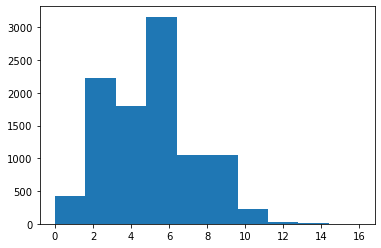

In [7]:
import matplotlib.pyplot as plt

plt.hist(trk_len);

In [8]:
# first ten entries, trk_px is a special jagged array
trk_px[:10]

<JaggedArray [[-0.692052 0.47761717 -0.3591095 ... 0.55543184 -0.55845773 0.3462323] [0.07138693 -0.12577307 0.2700106 0.77191937 0.32917196 0.9101592] [0.15179944 0.18735994 -0.0016744131] ... [-0.5512446 -0.13794646 -0.28729245 -0.62439764 0.08464406] [0.79375744 -0.245847 -0.25396547 -0.17818657] [0.30341583 0.17404547 -0.95900124]] at 0x029f82894e88>

In [9]:
trk_px.content[:20], trk_px.starts[:10], trk_px.stops[:10]

(array([-0.692052  ,  0.47761717, -0.3591095 ,  0.46245134,  0.55543184,
        -0.55845773,  0.3462323 ,  0.07138693, -0.12577307,  0.2700106 ,
         0.77191937,  0.32917196,  0.9101592 ,  0.15179944,  0.18735994,
        -0.00167441, -0.09476273, -0.23816565,  1.0100964 ,  1.0388347 ],
       dtype=float32),
 array([ 0,  7, 13, 16, 22, 26, 33, 37, 42, 46], dtype=int64),
 array([ 7, 13, 16, 22, 26, 33, 37, 42, 46, 49], dtype=int64))

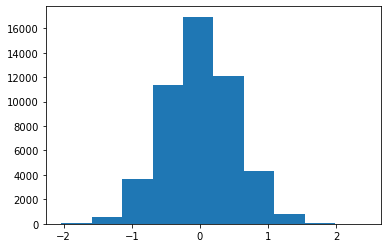

In [10]:
plt.hist(trk_px.content);

#### **Fits**

* Typical analysis work flow:
    1. Pre-select data and make compact data trees
    2. Make histograms and profiles from tree data
    3. Fit histograms and profiles to extract physical parameters
* Many specialized fitting tools for individual purposes, e.g.:
    - [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit)
    - [RooFit](https://root.cern.ch/roofit)
* Generic method
    - Select mathematical model (PDF) which describes data
    - Use maximum-likelihood method to adapt model to data
* Specialised methods give fast results for some types of problems
* Generic method allows one to do advanced things not implemented in specialised methods

Let's fit the px distribution with a normal distribution to extract the parameters $\mu$ and $\sigma$.

- To apply a maximum-likelihood method, we need a statistical model that describes the data
- Assumption 1: original data before histogramming is normal distributed; pdf is $\mathcal{N}(\mu, \sigma)$ with parameters $\mu$ and $\sigma$
- Assumption 2: count in histogram cell is Poisson distributed $P(n_i, \lambda_i)$
- Expected content in a histogram cell is $\lambda_i = N \int_{x_i}^{x_{i+1}} \mathcal{N}(\mu, \sigma) \, \text{d}x$, where $N$ is total number of events
- Likelihood is joint probability of data under model
  $L = \prod_i P(n_i, \lambda_i)$, need to maximize this by varying model parameters $\mu$ and $\sigma$
- Technical step to achieve this: Minimize score $S(\mu,\sigma) = -2\ln L(\mu, \sigma) = -2\sum_i \ln P(n_i; \lambda_i)$

In [11]:
import boost_histogram as bh

xaxis = bh.axis.Regular(50, -2, 2)
h_px = bh.Histogram(xaxis)

h_px.fill(trk_px.content)

Histogram(Regular(50, -2, 2), storage=Double()) # Sum: 49792.0 (49797.0 with flow)

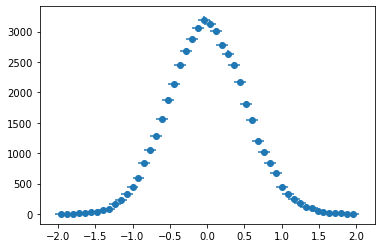

In [12]:
# scipy has efficient and correct implementations for most statistical distributions
from scipy.stats import norm, poisson

# get data from before
px_axis = h_px.axes[0]
cx = px_axis.centers
dx = px_axis.widths
xe = px_axis.edges
n = h_px.view()

plt.errorbar(cx, n, n**0.5, dx, fmt="o", label="data");

In [13]:
n_total = np.sum(n)

def score(mu, sigma):
    cdf = norm(mu, sigma).cdf
    lambdas = n_total * (cdf(xe[1:]) - cdf(xe[:-1]))
    probs = poisson.pmf(n, lambdas)
    return -2 * np.sum(np.log(probs + 1e-100)) # avoid taking log of zero

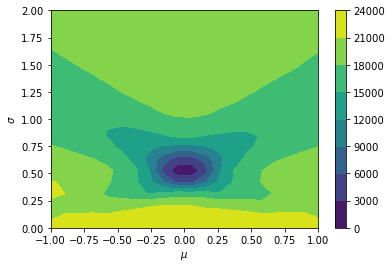

In [14]:
from matplotlib.ticker import LogLocator

mus = np.linspace(-1, 1, 20)
sigmas = np.linspace(1e-10, 2, 20)

g_mu, g_sigma = np.meshgrid(mus, sigmas)
g_score = np.vectorize(score)(g_mu, g_sigma)

plt.contourf(g_mu, g_sigma, g_score)
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.colorbar();

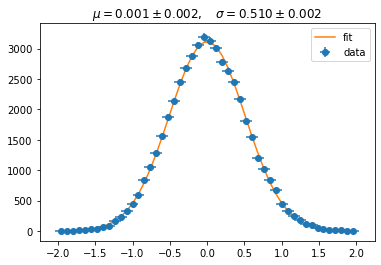

In [15]:
m = Minuit(score, mu=0, sigma=1, limit_sigma=(0, None), pedantic=False)
m.migrad()

mu, sigma = m.values.values()
s_mu, s_sigma = m.errors.values()

plt.errorbar(cx, n, n ** 0.5, dx, fmt="o", label="data");
plt.plot(cx, norm(mu, sigma).pdf(cx) * n_total * dx, label="fit")
plt.title(f"$\mu = {mu:.3f} \pm {s_mu:.3f}, \quad \sigma = {sigma:.3f} \pm {s_sigma:.3f}$")
plt.legend();

Check whether the fit is good:
- by looking at *pull distribution*
    - $(n_i - \lambda_i) / \lambda_i$ for Poisson distribute data
- by checking the $\chi^2$ value against the degrees of freedom
    - Simple check: $\chi^2/n_\text{dof}$ should be about 1
    - Better check: chance probability $\int_{\chi^2_\text{observed}}^{-\infty} P(\chi^2; n_\text{dof}) \, \text{d}\chi^2$ to obtain a higher value than the observed should not be too small

chi2/ndof = 56.450452339424075 / 48 = 1.1760510904046682
0.18844023432180046


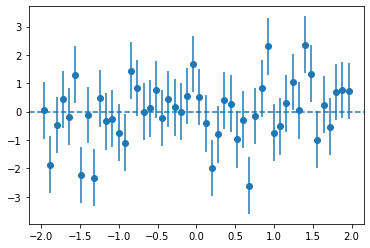

In [16]:
cdf = norm(mu, sigma).cdf

n_pred = (cdf(xe[1:]) - cdf(xe[:-1])) * n_total
n_sigma = n_pred ** 0.5 # for Poisson-distributed data

pull = (n - n_pred) / n_sigma

plt.errorbar(cx, pull, np.ones_like(pull), fmt="o")
plt.axhline(0, ls="--")

# degrees of freedom: number of fitted bins minus number of fitted parameters
n_dof = len(n) - 2 # need to subtract two fitted parameters

chi2_obs = np.sum(pull ** 2)

print(f"chi2/ndof = {chi2_obs} / {n_dof} = {chi2_obs / n_dof}")

from scipy.stats import chi2

chance_prob = 1 - chi2(n_dof).cdf(chi2_obs)

print(f"{chance_prob}")

## **3. Towards realistic HEP data usecases**

HEP analyses typically involve far more sophisticated fitting work. It is often about *data model building* and performing *(un)binned maximum likelihood fits* to describe experimental distributions.

The ROOT framework provides `RooFit` as a model fitting library. We will end this tutorial playing with the `zfit` package, a new-ish model fitting library based on TensorFlow and optimised for simple and direct manipulation of probability density functions.